# Project Introduction: Regression Model for Sales Prediction

In this project, we aim to build a robust regression model to predict **Total Sales** using historical food sales data 'Sample data food slaes.xlsx'. The dataset contains transactional records including region, city, product category, quantity, unit price, and order dates.

The primary goals of this project include:

- Exploring and understanding the dataset through visual and statistical methods.
- Cleaning and preparing the data with essential feature engineering.
- Building a predictive model to estimate total sales using Linear Regression.
- Evaluating the model's performance using metrics like R² Score, MAE, AbsCoefficient, Residuals/performance errors and RMSE etc.
- Exporting insights and predictions for visualization in tools like Excel and Power BI.

This end-to-end process demonstrates a complete machine learning pipeline—from raw data ingestion to model development and real world deployment integration helping stakeholders make informed, data-driven decisions to optimize sales performance.

## Loading libraries and dataset

In [1]:
#importing libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the relevant sheet 'FoodSales' into a dataframe

df = pd.read_excel("C:/Users/DELL/OneDrive/Documents/Sample data food slaes.xlsx", sheet_name = 'FoodSales')
df

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18
...,...,...,...,...,...,...,...
239,2021-12-18,East,Boston,Cookies,Arrowroot,34,2.18
240,2021-12-21,East,Boston,Cookies,Chocolate Chip,245,1.87
241,2021-12-24,East,Boston,Crackers,Whole Wheat,30,3.49
242,2021-12-27,West,Los Angeles,Bars,Bran,30,1.87


## inspecting the dataset

In [3]:
# display basic info

df.info

<bound method DataFrame.info of      OrderDate Region         City  Category         Product  Quantity  \
0   2020-01-01   East       Boston      Bars          Carrot        33   
1   2020-01-04   East       Boston  Crackers     Whole Wheat        87   
2   2020-01-07   West  Los Angeles   Cookies  Chocolate Chip        58   
3   2020-01-10   East     New York   Cookies  Chocolate Chip        82   
4   2020-01-13   East       Boston   Cookies       Arrowroot        38   
..         ...    ...          ...       ...             ...       ...   
239 2021-12-18   East       Boston   Cookies       Arrowroot        34   
240 2021-12-21   East       Boston   Cookies  Chocolate Chip       245   
241 2021-12-24   East       Boston  Crackers     Whole Wheat        30   
242 2021-12-27   West  Los Angeles      Bars            Bran        30   
243 2021-12-30   West  Los Angeles   Cookies  Oatmeal Raisin        44   

     UnitPrice  
0         1.77  
1         3.49  
2         1.87  
3         1

In [4]:
# Check data types of all columns

df.dtypes

OrderDate    datetime64[ns]
Region               object
City                 object
Category             object
Product              object
Quantity              int64
UnitPrice           float64
dtype: object

In [5]:
#check for missing values

df.isnull().sum()

OrderDate    0
Region       0
City         0
Category     0
Product      0
Quantity     0
UnitPrice    0
dtype: int64

In [6]:
# check for duplicates

df.duplicated().sum()

0

In [7]:
# summary statistics

df.describe()

,Quantity,UnitPrice
count,244.000000,244.000000
mean,63.286885,2.200820
std,47.112505,0.600169
min,20.000000,1.350000
25%,31.000000,1.770000
50%,47.000000,1.870000
75%,80.000000,2.840000
max,306.000000,3.490000


## Creating new features

In [8]:
# creating Total sales column
df['Total_sales'] = df['Quantity'] * df['UnitPrice']

In [9]:
# convert OrderDate to Datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.dtypes

OrderDate      datetime64[ns]
Region                 object
City                   object
Category               object
Product                object
Quantity                int64
UnitPrice             float64
Total_sales           float64
dtype: object

In [10]:
# extract Month, weekday and day 
df['Month'] = df['OrderDate'].dt.month
df['weekday'] = df['OrderDate'].dt.day_name()
df['day'] = df['OrderDate'].dt.day

#Viewing the new column
df

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,Total_sales,Month,weekday,day
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77,58.41,1,Wednesday,1
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49,303.63,1,Saturday,4
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46,1,Tuesday,7
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87,153.34,1,Friday,10
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84,1,Monday,13
...,...,...,...,...,...,...,...,...,...,...,...
239,2021-12-18,East,Boston,Cookies,Arrowroot,34,2.18,74.12,12,Saturday,18
240,2021-12-21,East,Boston,Cookies,Chocolate Chip,245,1.87,458.15,12,Tuesday,21
241,2021-12-24,East,Boston,Crackers,Whole Wheat,30,3.49,104.70,12,Friday,24
242,2021-12-27,West,Los Angeles,Bars,Bran,30,1.87,56.10,12,Monday,27


## Data Cleaning and Feature Engineering

In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Normalize text fields
df['Region'] = df['Region'].str.strip().str.lower()
df['City'] = df['City'].str.strip().str.lower()
df['Category'] = df['Category'].str.strip().str.lower()
df['Product'] = df['Product'].str.strip().str.lower()


## Exploratory Data Analysis (EDA)

In [12]:
# Group Total sales by product, region,Category and city for visualization

region_sales = df.groupby('Region')['Total_sales'].sum()
city_sales = df.groupby('City')['Total_sales'].sum()

# Trends over time
Monthly_sales = df.groupby('Month')['Total_sales'].sum()

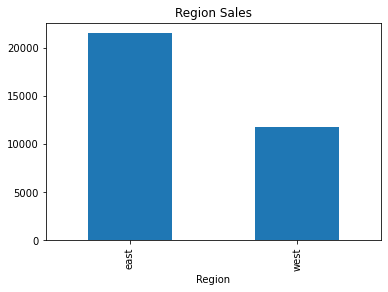

Region
west    11801.22
east    21524.36
Name: Total_sales, dtype: float64

In [13]:
# visualising sales by region

region_sales.plot(kind = "bar", title = "Region Sales")
plt.show()

region_sales.sort_values(ascending = True)

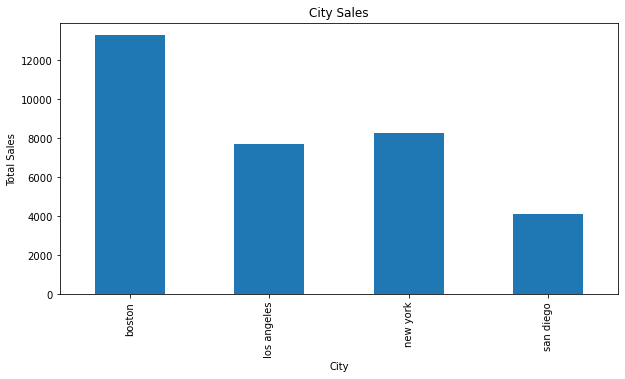

City
boston         13265.53
los angeles     7687.32
new york        8258.83
san diego       4113.90
Name: Total_sales, dtype: float64

In [14]:
# visualising sales by city

city_sales.plot(kind = "bar", figsize = (10,5), title = "City Sales")
plt.ylabel("Total Sales")
plt.show()

city_sales

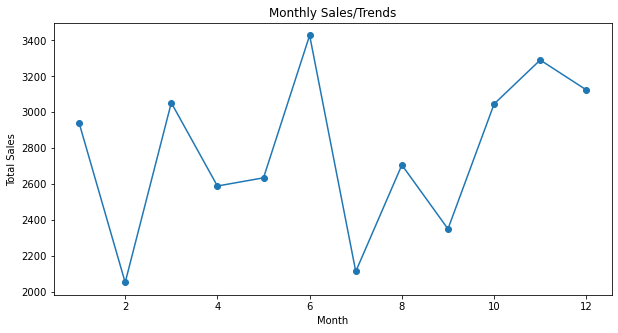

Month
1     2941.11
2     2051.46
3     3052.55
4     2588.76
5     2634.41
6     3428.23
7     2112.52
8     2705.94
9     2349.72
10    3045.78
11    3290.86
12    3124.24
Name: Total_sales, dtype: float64

In [15]:
# visualising trends over time

Monthly_sales.plot(kind = "line", figsize = (10, 5), title = "Monthly Sales/Trends", marker = "o")
plt.ylabel("Total Sales")
plt.show()

Monthly_sales

## Data Preprocessing for Regression



In [16]:
# importing libraries for buiding model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# duplicating dataframe
dm = df.copy()

# Select features and target
features = dm[['Region', 'City', 'Category', 'Product', 'Quantity', 'UnitPrice']]
target = dm['Total_sales']

# Define categorical and numeric columns
categorical_cols = ['Region', 'City', 'Category', 'Product']
numeric_cols = ['Quantity', 'UnitPrice']

# Column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])


# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)


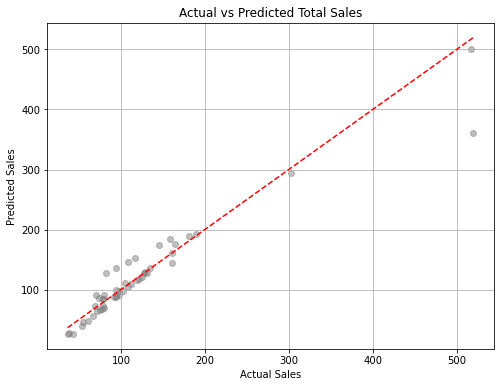

In [17]:
# Actual vs Predicted

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Total Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()


## Visualizations/Evaluations on model


In [18]:
# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"MAE: ₦{mae:.2f}")
print(f"RMSE: ₦{rmse:.2f}")

R² Score: 0.91
MAE: ₦14.11
RMSE: ₦27.35


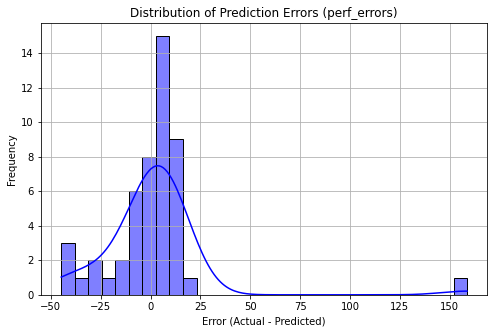

In [19]:
# Calculate how well the model predict total sales
perf_errors = y_test - y_pred

# Plot the histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(perf_errors, bins=30, kde=True, color='blue')
plt.title('Distribution of Prediction Errors (perf_errors)')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
# Get feature names after encoding
encoder = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(encoded_feature_names) + numeric_cols

# Extract coefficients
coefficients = model.named_steps['regressor'].coef_

# Create dataframe of features and coefficients
importance_dm = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by absolute importance
importance_dm['AbsCoefficient'] = importance_dm['Coefficient'].abs()
importance_dm = importance_dm.sort_values('AbsCoefficient', ascending=False)
importance_dm.head(10)

,Feature,Coefficient,AbsCoefficient
15,Product_oatmeal raisin,36.525163,36.525163
20,UnitPrice,30.413014,30.413014
14,Product_chocolate chip,-19.690142,19.690142
7,Category_cookies,9.843115,9.843115
10,Product_arrowroot,-6.991906,6.991906
13,Product_carrot,-6.638655,6.638655
6,Category_bars,-5.798443,5.798443
9,Category_snacks,-5.202603,5.202603
17,Product_pretzels,-4.680086,4.680086
2,City_boston,3.441070,3.441070


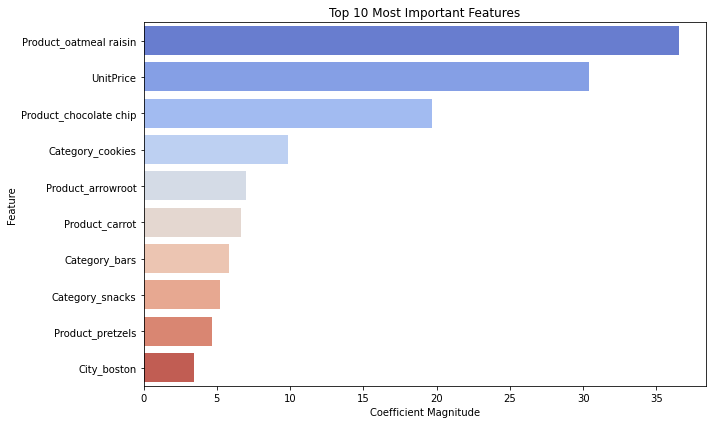

In [21]:
# visualising features most important in predicting sales

plt.figure(figsize=(10, 6))
sns.barplot(x='AbsCoefficient', y='Feature', data=importance_dm.head(10), palette='coolwarm')
plt.title('Top 10 Most Important Features')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [22]:
dm.head()

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,Total_sales,Month,weekday,day
0,2020-01-01,east,boston,bars,carrot,33,1.77,58.41,1,Wednesday,1
1,2020-01-04,east,boston,crackers,whole wheat,87,3.49,303.63,1,Saturday,4
2,2020-01-07,west,los angeles,cookies,chocolate chip,58,1.87,108.46,1,Tuesday,7
3,2020-01-10,east,new york,cookies,chocolate chip,82,1.87,153.34,1,Friday,10
4,2020-01-13,east,boston,cookies,arrowroot,38,2.18,82.84,1,Monday,13


In [23]:
# Save cleaned dataset
dm.to_excel("Cleaned_FoodSales.xlsx", index=False)

In [24]:
from IPython.display import FileLink
FileLink("Cleaned_FoodSales.xlsx")

C:\Users\DELL\Cleaned_FoodSales.xlsx

In [25]:
# Reconstruct the test set with predictions
X_test_copy = X_test.copy()
X_test_copy['ActualSales'] = y_test.values
X_test_copy['PredictedSales'] = y_pred

# Save actual vs predicted
X_test_copy.to_excel("Actual_vs_Predicted_Sales.xlsx", index=False)

# Generate a download link
FileLink("Actual_vs_Predicted_Sales.xlsx")

C:\Users\DELL\Actual_vs_Predicted_Sales.xlsx

In [26]:
# Generate a download link
FileLink("Actual_vs_Predicted_Sales.xlsx")

C:\Users\DELL\Actual_vs_Predicted_Sales.xlsx

In [27]:
import os

# Get current working directory
notebook_path = os.getcwd()
print("Current notebook path:", notebook_path)


Current notebook path: C:\Users\DELL


In [28]:
print("Files in directory:")
print(os.listdir())

Files in directory:
['.conda', '.condarc', '.continuum', '.docker', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.python_history', '.spyder-py3', '3D Objects', 'Actual_vs_Predicted_Sales.xlsx', 'AI and ML Project.ipynb', 'anaconda3', 'AppData', 'Application Data', 'Cleaned_FoodSales.xlsx', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Investigate_a_Dataset (2).html', 'Links', 'Local Settings', 'Marital Survey.ipynb', 'Microsoft', 'Music', 'My Documents', 'My Regression Model .ipynb', 'NetHood', 'NOTE.ipynb', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{545f8ecb-9fb7-11ec-9f68-78e4008918d9}.TM.blf', 'NTUSER.DAT{545f8ecb-9fb7-11ec-9f68-78e4008918d9}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{545f8ecb-9fb7-11ec-9f68-78e4008918d9}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Regression_Model.ipynb', 'Saved Games', 'Searches'